In [1]:
!pip install -q datasets transformers seqeval sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 57.3 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.1 MB/s eta 0:00:00


In [7]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [9]:
from datasets import load_dataset

dataset = load_dataset('GEOcite/DocumentSegmentationDataset', 'data', use_auth_token=True)

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'original_image': Image(decode=True, id=None),
 'dataset': Value(dtype='string', id=None),
 'labels': Sequence(feature=ClassLabel(names=['abstract', 'author', 'caption', 'equation', 'figure', 'footer', 'paragraph', 'reference', 'section', 'table', 'title'], id=None), length=-1, id=None)}

In [12]:
labels = ['abstract', 'author', 'caption', 'equation', 'figure', 'footer', 'paragraph', 'reference', 'section', 'table', 'title']

In [13]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
#id2label[-100] = 'pad'
#label2id['pad'] = -100
print(id2label)

{0: 'abstract', 1: 'author', 2: 'caption', 3: 'equation', 4: 'figure', 5: 'footer', 6: 'paragraph', 7: 'reference', 8: 'section', 9: 'table', 10: 'title'}


In [14]:
dataset = dataset.map(lambda example: {"pos": [x[1] for x in nltk.pos_tag(example["words"])]})

Map:   0%|          | 0/2579 [00:00<?, ? examples/s]

Map:   0%|          | 0/286 [00:00<?, ? examples/s]

In [15]:
def sent2labels(sent):
    return [id2label[label] for label in sent["labels"]]

y_train = [sent2labels(s) for s in dataset['train']]

In [16]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_flat = [y for sublist in y_train for y in sublist]
weights = compute_class_weight("balanced", classes=labels, y=y_flat)
label2bias = {l: w for l, w in zip(labels, weights)}

In [17]:
def word2features(dataset, i):
    word = dataset["words"][i]
    l = dataset["labels"][i]
    pos = dataset["pos"][i]


    features = {
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        #'postag': pos,
        #'postag[:2]': pos[:2],
    }
    if i > 0:
        word1 = dataset["words"][i-1]
        l1 = dataset["labels"][i-1]
        pos1 = dataset["pos"][i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            #'-1:postag': pos1,
            #'-1:postag[:2]': pos1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(dataset["words"])-1:
        word1 = dataset["words"][i+1]
        l1 = dataset["labels"][i+1]
        pos1 = dataset["pos"][i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            #'+1:postag': pos1,
            #'+1:postag[:2]': pos1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent["words"]))]

def sent2labels(sent):
    return [id2label[label] for label in sent["labels"]]

def sent2tokens(sent):
    return [token for token in sent["words"]]

In [18]:
d_train = dataset['train']
d_test = dataset['test']

X_train = [sent2features(s) for s in d_train]
y_train = [sent2labels(s) for s in d_train]

X_test = [sent2features(s) for s in d_test]
y_test = [sent2labels(s) for s in d_test]

In [19]:
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

AttributeError: ignored

AttributeError: ignored

AttributeError: ignored

# Evaluation

In [ ]:
crf_labels = list(crf.classes_)

In [ ]:
from sklearn_crfsuite import metrics

y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred,
                      average='micro', labels=crf_labels)

0.9969735314452692

In [ ]:
print(metrics.flat_classification_report(
    y_test, y_pred, labels=crf_labels, digits=3
))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['paragraph', 'author', 'section', 'reference', 'caption', 'title', 'figure', 'footer', 'equation', 'abstract', 'table'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


              precision    recall  f1-score   support

   paragraph      1.000     1.000     1.000     95924
      author      0.996     0.939     0.966      2392
     section      0.953     0.940     0.947       782
   reference      1.000     1.000     1.000     30796
     caption      0.955     0.968     0.961      2367
       title      0.953     0.960     0.957       999
      figure      0.975     0.889     0.930       696
      footer      0.996     0.996     0.996      4846
    equation      0.966     0.975     0.971      1656
    abstract      1.000     1.000     1.000     11903
       table      0.850     0.990     0.914       953

    accuracy                          0.997    153314
   macro avg      0.968     0.969     0.967    153314
weighted avg      0.997     0.997     0.997    153314



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from tqdm.auto import tqdm
from glob import glob

In [ ]:
base_filename = f"fig_docseg_crf_all_notweighted_"

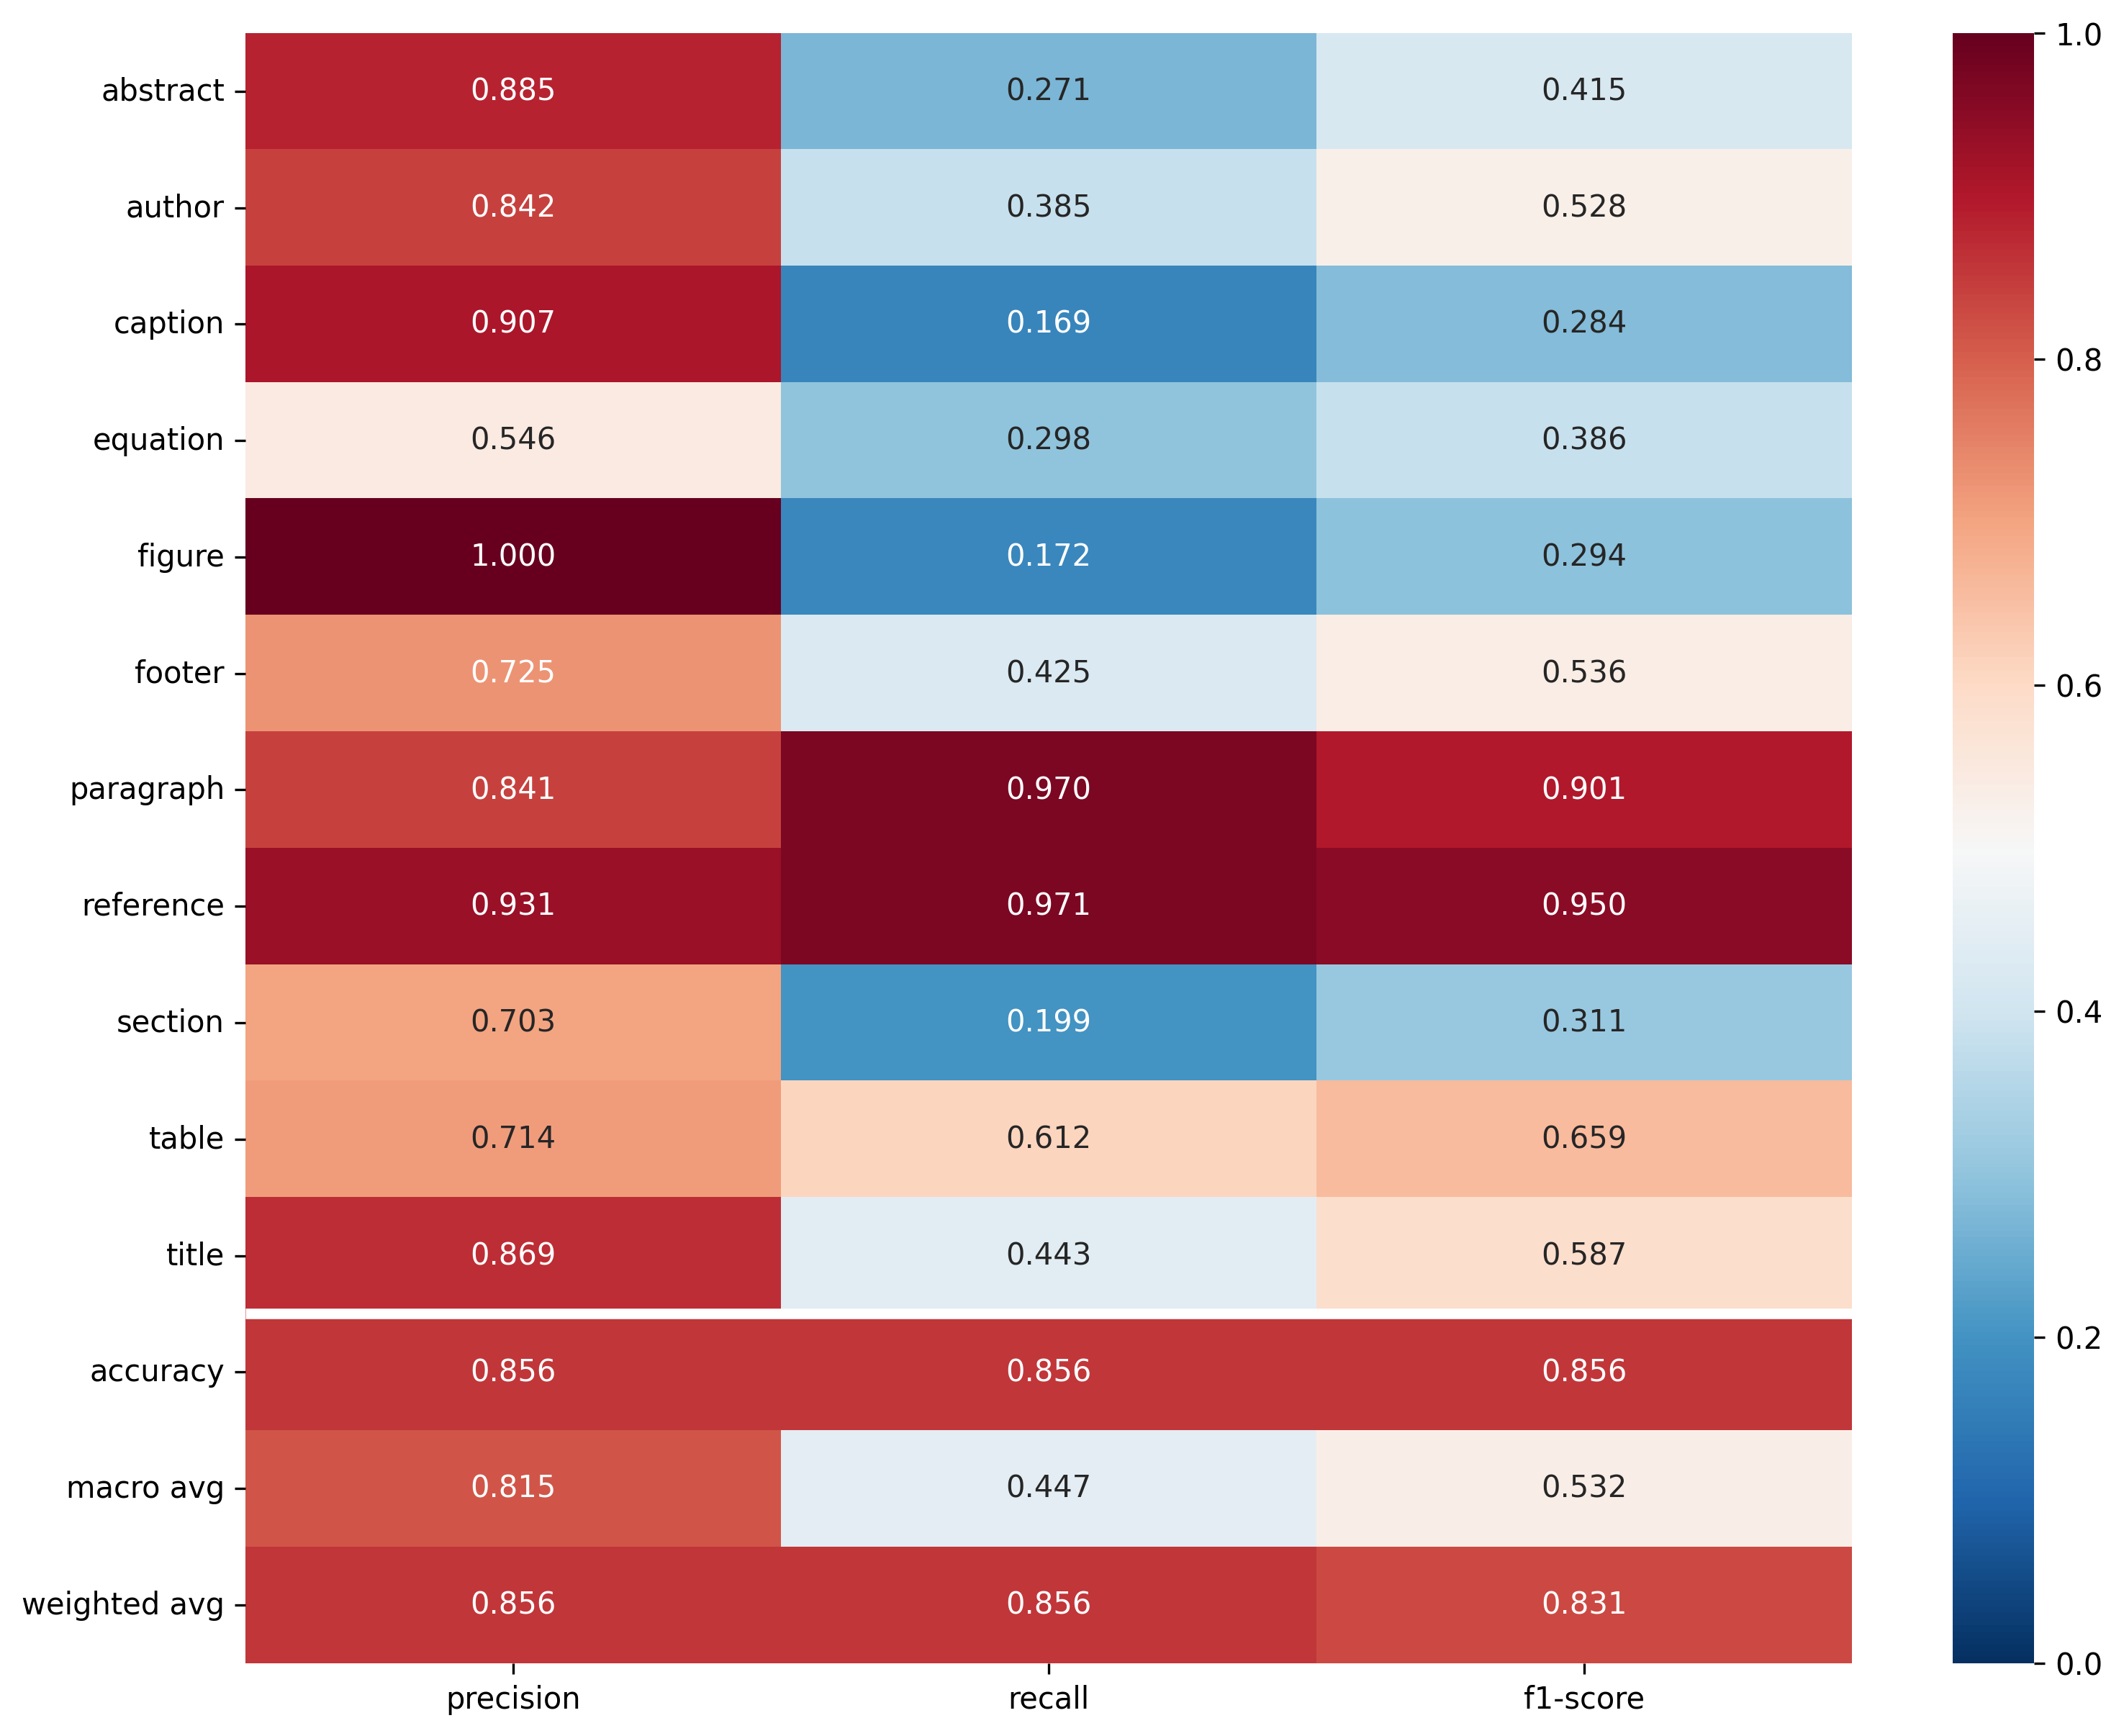

In [ ]:
# for key, (y_test, y_pred) in dataset2pred.items():
#     y_trues_label = [id2label[y] for row in y_test for y in row]
#     y_preds_label = [id2label[y] for row in y_pred for y in row]

report = metrics.flat_classification_report(y_test, y_pred, labels=labels, output_dict=True)
df_cr = pd.DataFrame(report)
fig, ax = plt.subplots(figsize=(12,10), dpi=300)
sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
ax.hlines([len(labels)], *ax.get_xlim(), colors="white", linewidths = 3.5)
fig.show()
fig.savefig(base_filename + "cls_report.png")

In [ ]:
for key, (y_trues, y_preds) in dataset2pred.items():
    y_trues_label = [id2label[y] for row in y_trues for y in row]
    y_preds_label = [id2label[y] for row in y_preds for y in row]

    for norm in ["true", "pred"]:
        confusion_matrix = metrics.confusion_matrix(y_trues_label, y_preds_label, normalize=norm, labels=labels)
        df_cm = pd.DataFrame(confusion_matrix, index = labels,
                        columns = labels)
        #plt.figure(figsize = (10,10))
        fig, ax = plt.subplots(figsize=(12,10), dpi=300)
        s = sns.heatmap(df_cm, annot=True, fmt=".3f", cmap= 'RdBu_r', ax=ax, vmin=0, vmax=1)
        s.set(xlabel='Predicted labels', ylabel='True labels')
        plt.yticks(rotation=0)
        plt.xticks(rotation=30)
        fig.show()
        fig.savefig(base_filename + f"conf_matrix_norm_{norm}_" + key + ".png")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('Compressing image files...')
path_csv_files = glob('*.png')
with zipfile.ZipFile(base_filename + '11_1_23.zip', 'w') as zipMe:
    for file in tqdm(path_csv_files):
        zipMe.write(file, compress_type=zipfile.ZIP_DEFLATED)
!find . -name "*.png" -type f -delete

Compressing image files...


  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
trainer.push_to_hub()

Saving model checkpoint to layout-xlm-geocite-v2
Configuration saved in layout-xlm-geocite-v2/config.json
Model weights saved in layout-xlm-geocite-v2/pytorch_model.bin
tokenizer config file saved in layout-xlm-geocite-v2/tokenizer_config.json
Special tokens file saved in layout-xlm-geocite-v2/special_tokens_map.json
Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


Upload file pytorch_model.bin:   0%|          | 3.30k/1.38G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|#########9| 3.30k/3.31k [00:00<?, ?B/s]

Upload file tokenizer.json:   0%|          | 3.30k/16.3M [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 3.30k/4.83M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   23ccfa8..5bc7344  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   23ccfa8..5bc7344  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Token Classification', 'type': 'token-classification'}}
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   5bc7344..a3c9a50  main -> main

   5bc7344..a3c9a50  main -> main



'https://huggingface.co/MrPotato/layout-xlm-geocite-v2/commit/5bc73442cfa797e7c1f029432a67ed64b8c23dfd'